# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# data exploration

In [3]:
path = os.getcwd() + '/data/Rotmod_LTG/'

In [9]:
filename = path + 'CamB_rotmod.dat'
data = np.loadtxt(filename)

print(data)

[[ 0.16  1.99  1.5   1.86  3.75  0.   30.32  0.  ]
 [ 0.41  4.84  1.5   4.24  9.47  0.   23.77  0.  ]
 [ 0.57  6.79  1.5   5.61 11.76  0.   15.87  0.  ]
 [ 0.73  8.87  1.5   6.77 13.72  0.   12.4   0.  ]
 [ 0.9  10.9   1.5   7.77 14.8   0.    9.63  0.  ]
 [ 1.06 12.9   1.5   8.44 15.24  0.    5.86  0.  ]
 [ 1.22 14.7   1.5   8.64 15.11  0.    5.19  0.  ]
 [ 1.47 16.8   1.5   8.08 15.9   0.    3.02  0.  ]
 [ 1.79 20.1   1.5   6.91 14.91  0.    0.88  0.  ]]


Need to write a function to load the data into a pandas dataframe

In [23]:
def get_data(filename):
    with open(filename) as f:
        lines = f.readlines()

    distance = float(lines[0].lstrip("# Distance = ").strip().split()[0])
    colnames = lines[1].lstrip("# ").split()
    units = lines[2].lstrip("# ").split()

    df = pd.read_csv(
        filename,
        comment="#",
        sep=r"\s+",
        names=colnames,
        skiprows=2    # skip the two # header lines
    )
    
    # stack colnames and units to turn into a new df
    units_df = pd.DataFrame([units], columns=colnames)
    
    return df, units_df, distance
    

In [27]:
filename = path + 'DDO161_rotmod.dat'

df, units, dist = get_data(filename)

df.columns

Index(['Rad', 'Vobs', 'errV', 'Vgas', 'Vdisk', 'Vbul', 'SBdisk', 'SBbul'], dtype='object')

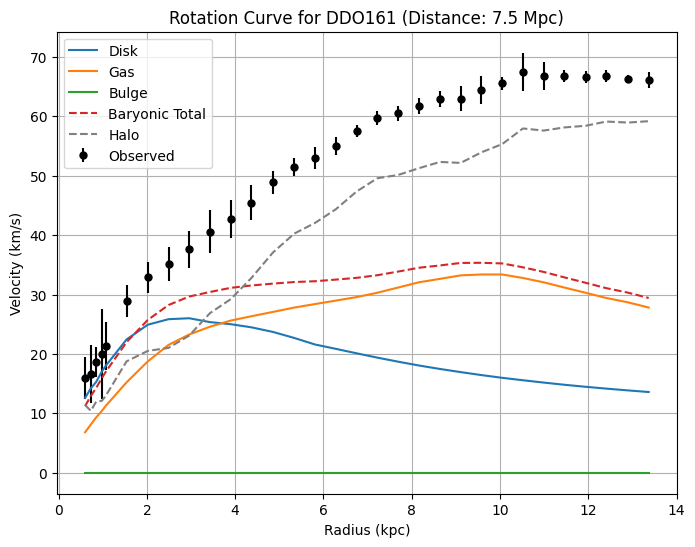

In [ ]:
# plot the rotation curve and its components

SMTLdisk = 0.5  # example mass-to-light ratio for disk
SMTLbulge = 0.7  # example mass-to-light ratio for bulge

# total baryon component
Vbaryon = np.sqrt(SMTLdisk * df['Vdisk']**2 + SMTLbulge * df['Vbul']**2 + df['Vgas']**2)
# total dark matter component inferred 
Vhalo = np.sqrt(df['Vobs']**2 - Vbaryon**2)

# plotting 
plt.figure(figsize=(8,6))
plt.errorbar(df['Rad'], df['Vobs'], yerr=df['errV'], fmt='o', label='Observed', color='black', markersize=5)
plt.plot(df['Rad'], df['Vdisk'], label='Disk', color='C0')
plt.plot(df['Rad'], df['Vgas'], label='Gas', color='C1')
plt.plot(df['Rad'], df['Vbul'], label='Bulge', color='C2') 
plt.plot(df['Rad'], Vbaryon, label='Baryonic Total', color='C3', linestyle='--')
plt.plot(df['Rad'], Vhalo, label='Halo', color='grey', linestyle='--')


plt.xlabel(f"Radius ({units.at[0, 'Rad']})")
plt.ylabel(f"Velocity ({units.at[0, 'Vobs']})")
plt.title(f"Rotation Curve for DDO161 (Distance: {dist} Mpc)")
plt.legend()
plt.grid()
plt.show()